In [1]:
import numpy as np
import pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv('/kaggle/input/indianrainfall/Indianweathercsv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Delhi,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Delhi,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Delhi,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Delhi,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Delhi,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# most min temp
print("Minimum Temperature   "+str(df['MinTemp'].min()))
df.groupby('Location',sort = False)['MinTemp'].min().nsmallest()


Minimum Temperature   -8.5


Location
MountGinini    -8.5
Ahemdabad      -8.2
Kolkata        -8.0
Cuttack        -5.6
AliceSprings   -5.2
Name: MinTemp, dtype: float64

In [5]:
print("Maximum Temperature   "+str(df['MaxTemp'].max()))
df.groupby('Location',sort = False)['MaxTemp'].max().nlargest()

Maximum Temperature   48.1


Location
Woomera             48.1
Hyderabad           47.3
Richmond            47.0
Penrith             46.9
MelbourneAirport    46.8
Name: MaxTemp, dtype: float64

In [6]:
#Highest Rainfall
print("Highest Rainfall      "+str(df['Rainfall'].max()))
df.groupby('Location',sort = False)['Rainfall'].max().nlargest()

Highest Rainfall      371.0


Location
CoffsHarbour    371.0
Darwin          367.6
Cairns          278.4
Newcastle       240.0
Bengaluru       236.8
Name: Rainfall, dtype: float64

In [7]:
#missing values:
df.isnull().mean()

Date             0.000000
Location         0.000000
MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
dtype: float64

In [8]:
# Data Cleaning
# Missing values % in the features Evaporation=43%, Sunshine 48%, Cloud9am=38%, Cloud3pm=40% 
# This are to much missing value, I'm dropping this features.

df=df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis = 1)

In [9]:
# Seperating Categories and numerical features

df_cat=df[['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow','Date','Location']]

df_num=df.drop(['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow','Date','Location'], axis = 1)

In [10]:
# Every location has different windspeed, direction, Temperature and Pressure  
# Replacing Categories features with most frequent value based on location 

for col in df_cat.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    df_cat[col] = df.groupby(['Location'])[col].apply(lambda x: x.fillna(x.mode().max()))

In [11]:
# Still we have missing value for WindGustDir because for few locations we have no values 

df_cat.isnull().mean()

WindGustDir     0.041792
WindDir9am      0.000000
WindDir3pm      0.000000
RainToday       0.000000
RainTomorrow    0.000000
Date            0.000000
Location        0.000000
dtype: float64

In [12]:
# We replace this values with the mode of complete dataset

df_cat['WindGustDir']=df['WindGustDir'].fillna(df['WindGustDir'].mode().max())

In [13]:
for col in df_num.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    df_num[col] = df.groupby(['Location'])[col].apply(lambda x: x.fillna(x.mean()))

In [14]:
# This has same problem as df_cat, We will replace is mean value of dataset

df_num['WindGustSpeed']=df_num['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df_num['Pressure9am']=df_num['Pressure9am'].fillna(df['Pressure9am'].mean())
df_num['Pressure3pm']=df_num['Pressure3pm'].fillna(df['Pressure3pm'].mean())

In [15]:
d={'Yes':1,'No':0}
df_cat['RainTomorrow']=df_cat['RainTomorrow'].map(d)
df_cat['RainToday']=df_cat['RainToday'].map(d)

In [16]:
df_cat2=df_cat[['WindGustDir','WindDir9am','WindDir3pm','Location']]

#Replacing Categories value with value counts

df_cat2['Location']=df_cat2['Location'].map(df_cat2['Location'].value_counts())
df_cat2['WindGustDir']=df_cat2['WindGustDir'].map(df_cat2['WindGustDir'].value_counts())
df_cat2['WindDir9am']=df_cat2['WindDir9am'].map(df_cat2['WindDir9am'].value_counts())
df_cat2['WindDir3pm']=df_cat2['WindDir3pm'].map(df_cat2['WindDir3pm'].value_counts())

In [17]:
df_n=pd.merge(df_num, df_cat2, left_index=True, right_index=True)

In [18]:
# Using Standar Scaler to scaled

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_n)
df_scaled = pd.DataFrame(scaler.fit_transform(df_n),columns = df_n.columns)

In [19]:
df_x=pd.merge(df_scaled, df_cat['RainToday'],left_index=True, right_index=True)

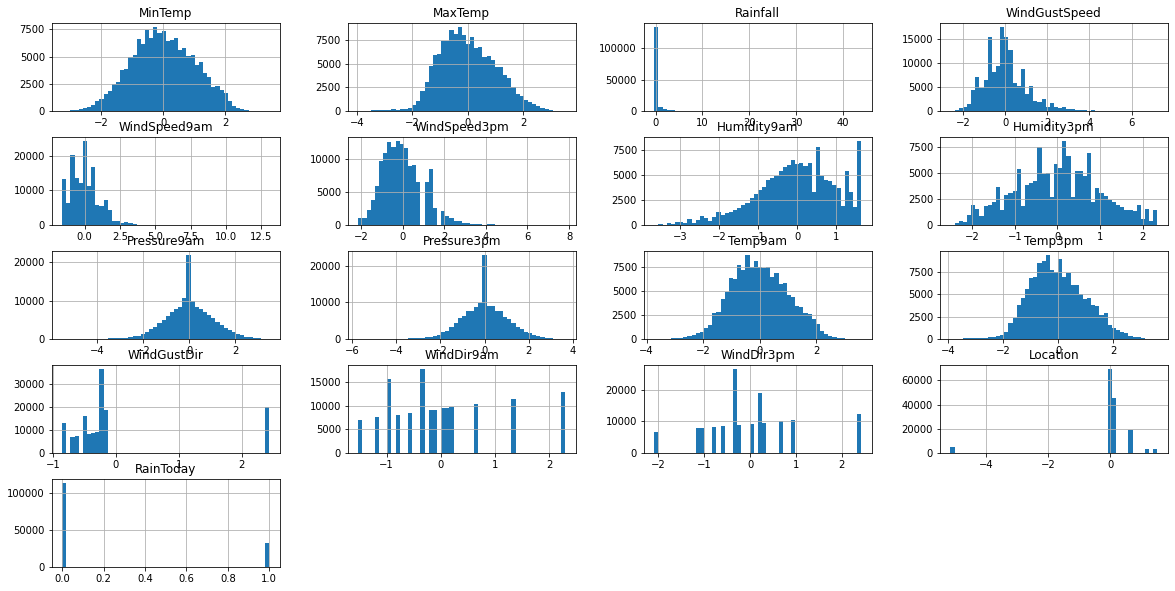

In [20]:
df_x.hist(bins=50, figsize=(20, 10))
plt.show()

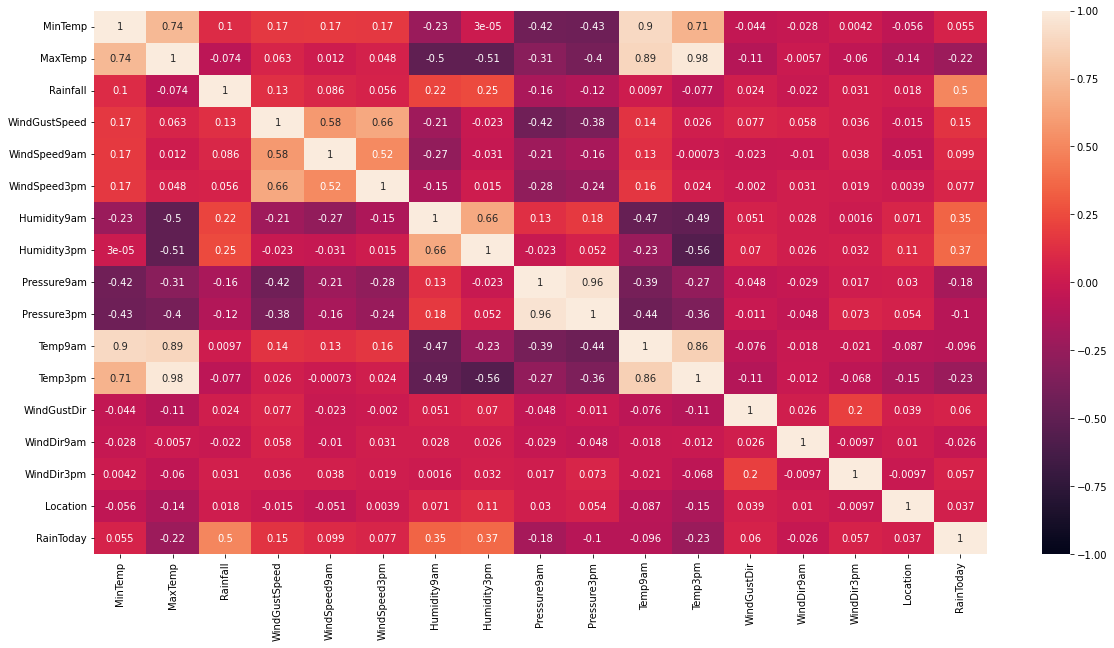

In [21]:
# Let see the correlation

plt.figure(figsize=(20,10))
heatmap = sns.heatmap(df_x.corr(), vmin=-1, vmax=1, annot=True)

In [22]:
# Teamp9am(89%) and Temp3pm(98%) has high correlation with MaxTemp

df_x.drop('Temp9am',axis=1,inplace=True)
df_x.drop('Temp3pm',axis=1,inplace=True)

In [23]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df_x, df_cat['RainTomorrow'], test_size=0.2, random_state=50)

<AxesSubplot:>

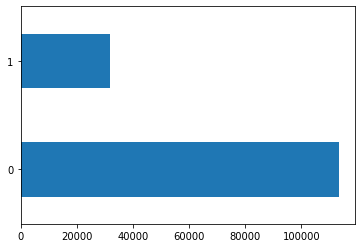

In [24]:
#As we can see we are dealing with big imbalance dataset, We need to perform oversampling

df_cat['RainTomorrow'].value_counts().plot(kind='barh')

In [25]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 37) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
from collections import Counter

print("Before {}".format(Counter(y_train)))
print("After {}".format(Counter(y_train_res)))

Before Counter({0: 90784, 1: 25584})
After Counter({1: 90784, 0: 90784})


In [26]:
from sklearn import datasets, linear_model, metrics 
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=10,random_state = 37)
model.fit(X_train_res, y_train_res)
model.score(X_train_res, y_train_res)

y_pred = model.predict(X_test)

In [27]:
print('Confusion matrix \n {}'.format(confusion_matrix(y_test,y_pred)))
print('Accuracy score {:.2f}'.format(accuracy_score(y_test,y_pred)*100))
print(classification_report(y_test,y_pred))

Confusion matrix 
 [[21360  1439]
 [ 2847  3446]]
Accuracy score 85.27
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     22799
           1       0.71      0.55      0.62      6293

    accuracy                           0.85     29092
   macro avg       0.79      0.74      0.76     29092
weighted avg       0.84      0.85      0.85     29092



In [28]:

from prophet import Prophet

m = Prophet()

df_for=df[['Date','Rainfall']]
df_for['Date']=pd.to_datetime(df_for['Date'])
df_for.rename(columns = {'Date':'ds'}, inplace = True)
df_for.rename(columns = {'Rainfall':'y'}, inplace = True)
m.fit(df_for)

07:38:49 - cmdstanpy - INFO - Chain [1] start processing
07:39:11 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
future = m.make_future_dataframe(periods=1285)
future.tail()

,ds
4716,2020-12-27
4717,2020-12-28
4718,2020-12-29
4719,2020-12-30
4720,2020-12-31


In [30]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4716,2020-12-27,2.492382,-15.472855,20.984035
4717,2020-12-28,2.488123,-16.286479,20.489866
4718,2020-12-29,2.375423,-15.918484,20.955142
4719,2020-12-30,2.389793,-15.705261,20.017823
4720,2020-12-31,2.390426,-16.320866,20.526300


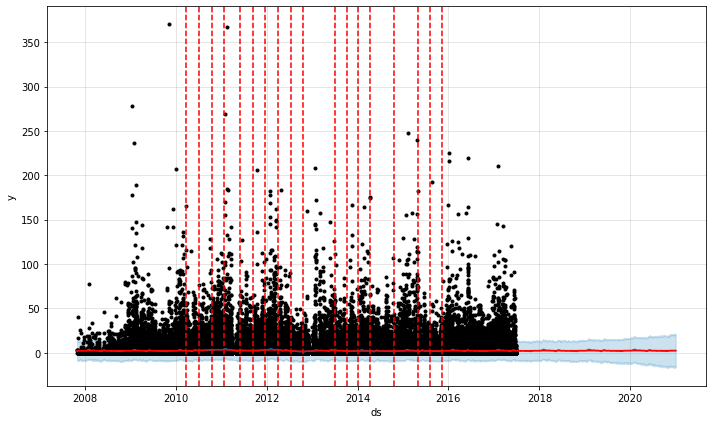

In [31]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)